Importamos la paquetería de pandas

In [1]:
import pandas as pd

Leemos el archivo con la base de datos de los cráteres

In [2]:
crateres = pd.read_csv('Base de Datos Crateres.csv')
print(crateres)

             Cráter  Diámetro       Ubicación Clave  Latitud  Longitud
0           Acraman        90       Australia   AUS  -32.010   135.450
1        Araguainha        40          Brasil   BRA  -16.800   -52.980
2        Beaverhead        60  Estados Unidos   USA   46.130  -112.830
3        Charlevoix        54          Canadá   CAN   47.530   -70.300
4    Chesapeake Bay        40  Estados Unidos   USA   37.280   -76.010
5         Chicxulub       150          México   MEX   21.400   -89.510
6              Kara        65           Rusia   RUS   69.100    64.150
7          Kara-Kul        52      Tayikistán   TJK   39.030    73.420
8       Manicouagan        85          Canadá   CAN   51.127   -68.735
9           Mjølnir        40         Noruega   NOR   73.800    29.660
10       Montagnais        45          Canadá   CAN   42.880   -64.220
11        Morokweng        70       Sudáfrica   ZAF  -26.460    23.530
12          Popigai        90           Rusia   RUS   71.650   111.180
13  Pu

Queremos ver los diámetros que se tienen dentro de la base de datos y los valores que se repiten. Utilizamos .value_counts() para ello

In [3]:
print(crateres['Diámetro'].value_counts())

40     6
90     2
52     2
60     1
54     1
150    1
65     1
85     1
45     1
70     1
130    1
55     1
160    1
Name: Diámetro, dtype: int64


Cambiamos el tipo de datos que nos da el diámetro para que posteriormente no haya incompatibilidades con el mapa interactivo

In [4]:
crateres['Diámetro'] = crateres['Diámetro'].astype(float)
crateres['Diámetro'].head()

0    90.0
1    40.0
2    60.0
3    54.0
4    40.0
Name: Diámetro, dtype: float64

Importamos la paquetería de pygmt para crear nuestros mapas estáticos, que serán la base para el mapa interactivo

In [5]:
import pygmt

Primero creamos una gráfica para dar un estimado del área de influencia que tendría el cráter

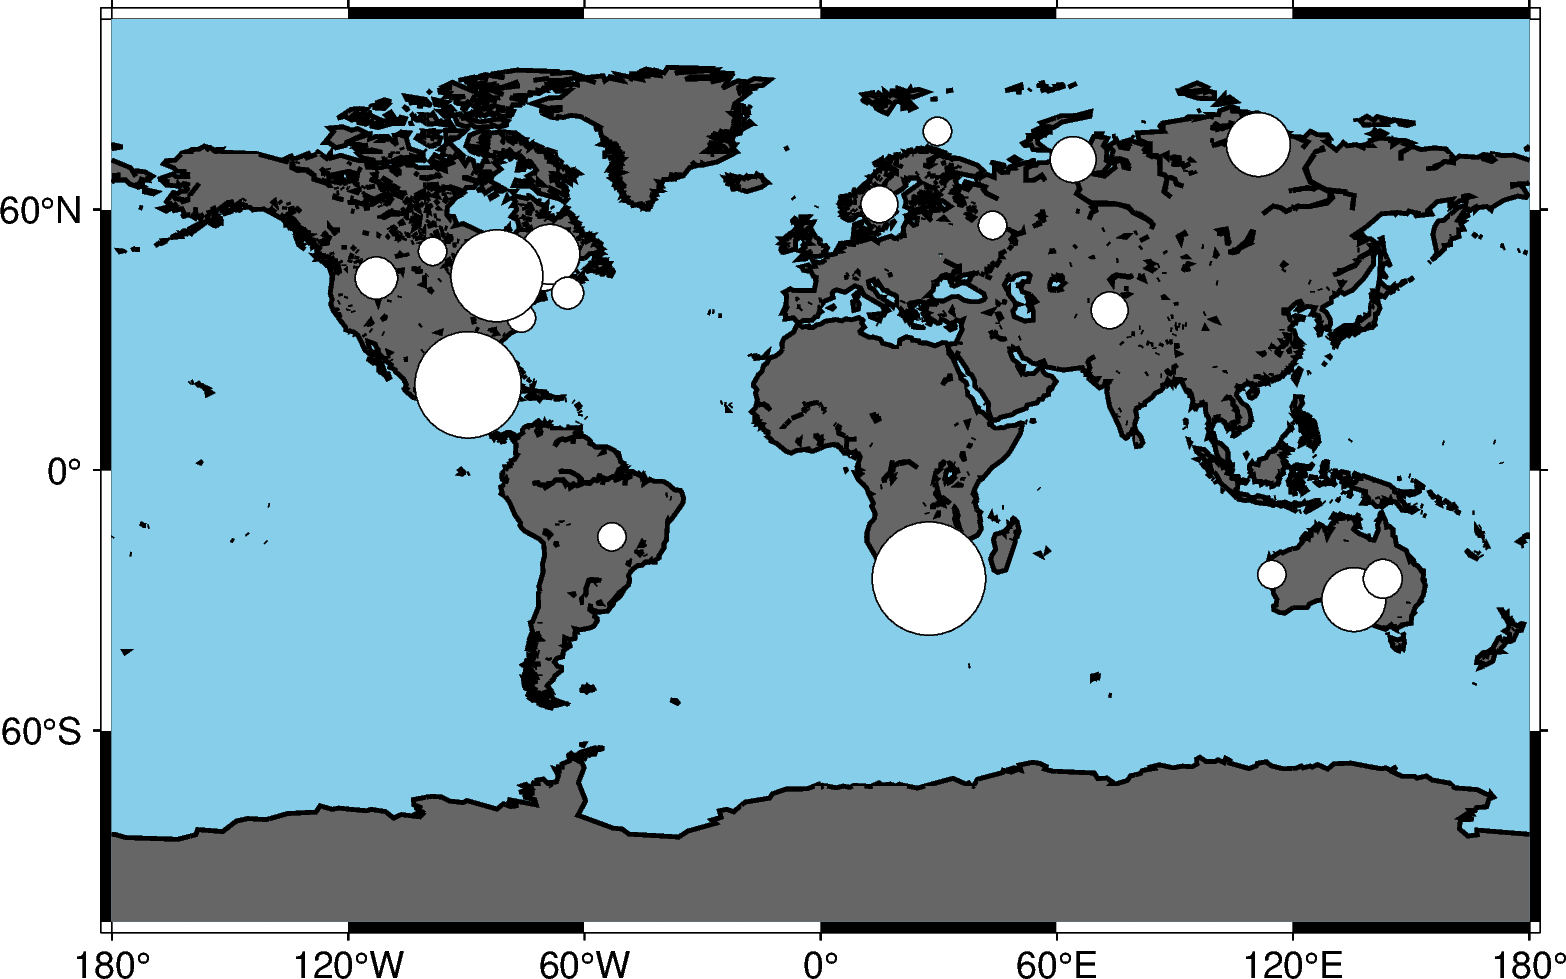

In [6]:
region = "d"
projection = 'Cyl_stere/12c'
fig = pygmt.Figure()
fig.basemap(region = region, projection = "Cyl_stere/12c", frame = 'a')
fig.coast(shorelines = ['1'], land = '#666666', water = 'skyblue')
fig.plot(x = crateres['Longitud'], y = crateres['Latitud'], style = 'cc',
         size = 0.006 * (crateres['Diámetro']), color = 'white', pen = 'black')
fig.show()

Ahora creamos un mapa con una aproximación del tamaño original del cráter con una escala de profundidades

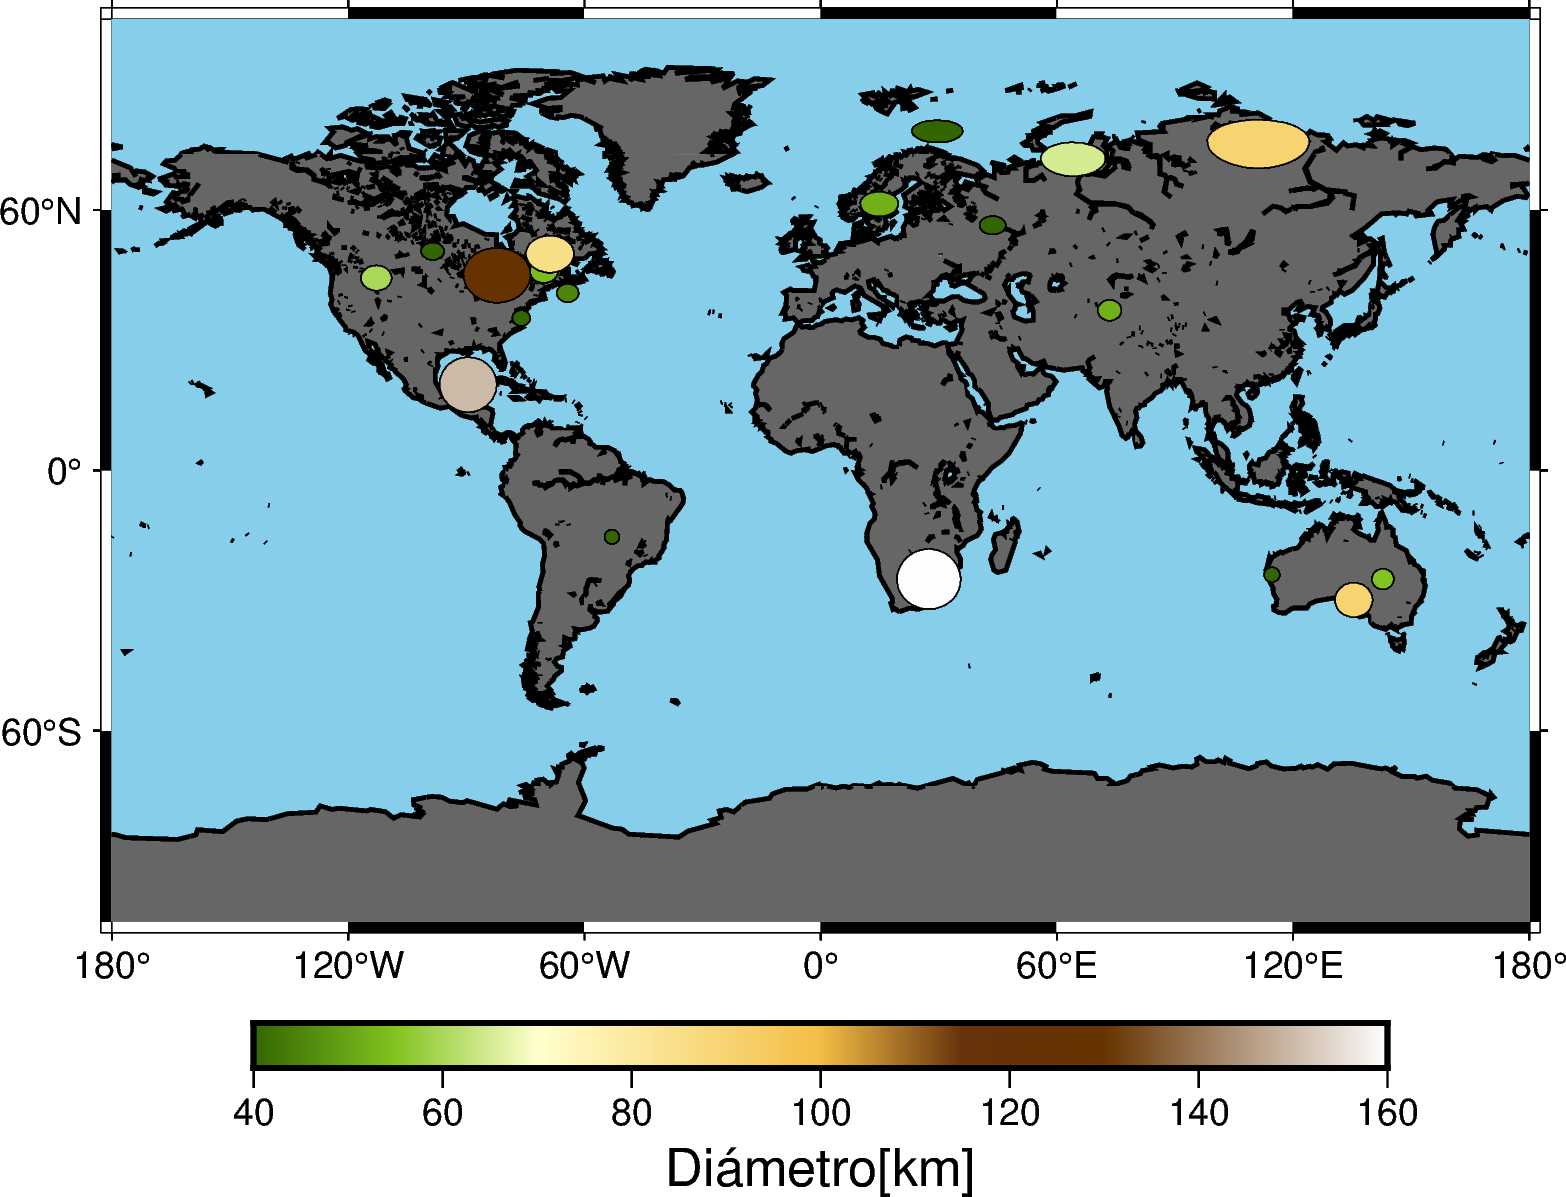

In [7]:
fig = pygmt.Figure()
pygmt.makecpt(cmap = 'world', series = [crateres['Diámetro'].min(), crateres['Diámetro'].max()])
fig.basemap(region = region, projection = 'Cyl_stere/12c', frame = 'a')
fig.coast(shorelines = ['1'], land = '#666666', water = 'skyblue')
fig.plot(x = crateres['Longitud'], y = crateres['Latitud'], style = 'E-',
         size = 10 * (crateres['Diámetro']), color = crateres['Diámetro'], 
         cmap = True, pen = 'black')
fig.colorbar(frame = 'a+l"Diámetro[km]"')
fig.show()

Importamos la paquetería de folium para crear nuestros mapas interactivos

In [8]:
import folium
import branca

Queremos asignar diferentes colores a cada pop-up con respecto a su diámetro, por lo que se crea una columna extra dentro de la base de datos. Código de colores para la asignación de los diferentes cráteres:
* Rojo oscuro = 160 km
* Rojo = 150 km
* Naranja = 130 km
* Beige = 90 km
* Verde claro = 85 km
* Verde = 70 km
* Azul = 65 km
* Azul claro = 60 km
* Rosa = 55 km
* Morado = 54 km 
* Azul cadete = 52 km
* Gris = 45 km
* Negro = 40 km

In [9]:
colores = ['beige', 'black', 'lightblue', 'purple', 'black', 'red', 'blue', 'cadetblue', 'lightgreen',
           'black', 'gray', 'green', 'beige', 'black', 'black', 'cadetblue', 'orange', 'pink',
           'darkred', 'black']
crateres['Color'] = colores
crateres

,Cráter,Diámetro,Ubicación,Clave,Latitud,Longitud,Color
0,Acraman,90.0,Australia,AUS,-32.010,135.450,beige
1,Araguainha,40.0,Brasil,BRA,-16.800,-52.980,black
2,Beaverhead,60.0,Estados Unidos,USA,46.130,-112.830,lightblue
3,Charlevoix,54.0,Canadá,CAN,47.530,-70.300,purple
4,Chesapeake Bay,40.0,Estados Unidos,USA,37.280,-76.010,black
5,Chicxulub,150.0,México,MEX,21.400,-89.510,red
6,Kara,65.0,Rusia,RUS,69.100,64.150,blue
7,Kara-Kul,52.0,Tayikistán,TJK,39.030,73.420,cadetblue
8,Manicouagan,85.0,Canadá,CAN,51.127,-68.735,lightgreen
9,Mjølnir,40.0,Noruega,NOR,73.800,29.660,black


Creamos los pop-ups mediante una función que vaya corriendo para cada línea de la base de datos

In [10]:
def popup_html(row):
    i = row
    Nombre_crater = crateres['Cráter'].iloc[i] 
    diametro = crateres['Diámetro'].iloc[i]
    ubicacion = crateres['Ubicación'].iloc[i] 
    left_col_color = "#19a7bd"
    right_col_color = "#f2f0d3"
    html = """<!DOCTYPE html>
<html>
<head>
<h4 style="margin-bottom:10"; width="200px">{}</h4>""".format(Nombre_crater) + """
</head>
    <table style="height: 126px; width: 350px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Diámetro</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(diametro) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Ubicación</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(ubicacion) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

Primero creamos un mapa interactivo con el tipo de mapa base que folium da para corroborar que todo funciona correctamente

In [11]:
location = crateres['Latitud'].mean(), crateres['Longitud'].mean()
m = folium.Map(location = location, zoom_start = 1)
for i in range(0, len(crateres)):
    labels = f"Nombre = {crateres['Cráter'].iloc[i]} \n Diámetro = {crateres['Diámetro'].iloc[i]} km" 
    folium.Marker([crateres['Latitud'].iloc[i], crateres['Longitud'].iloc[i]], popup = labels,
                  icon = folium.Icon(color = "purple", icon = 'fa-star', prefix = 'fa')).add_to(m)
    folium.Circle([crateres['Latitud'].iloc[i], crateres['Longitud'].iloc[i]],
                    radius = crateres['Diámetro'].iloc[i]*1000, color = 'yellow').add_to(m)       
m.save('Mapa1.html')
m

Una vez corroborado, creamos el mapa interactivo mediante el código de colores creado para aplicarlo tanto para el pop-up como para el radio, así como agregarle un terreno con relieve a todo aquello que sea tierra en el mapa, y lo salvamos en un archivo html

In [12]:
location = crateres['Latitud'].mean(), crateres['Longitud'].mean()
m = folium.Map(location = location, zoom_start = 1, tiles = "Stamen Terrain")
for i in range(0, len(crateres)):
    labels = f"Nombre = {crateres['Cráter'].iloc[i]} \n Diámetro = {crateres['Diámetro'].iloc[i]} km"
    folium.Marker([crateres['Latitud'].iloc[i], crateres['Longitud'].iloc[i]], popup = labels,
                 icon = folium.Icon(color = crateres['Color'].iloc[i], icon = 'fa-star',
                                    prefix = 'fa')).add_to(m)
    folium.Circle([crateres['Latitud'].iloc[i], crateres['Longitud'].iloc[i]], 
                  radius = crateres['Diámetro'].iloc[i]*1000, color = crateres['Color'].iloc[i]).add_to(m)
    html = popup_html(i)
    iframe = branca.element.IFrame(html = html, width = 510, height = 280)
    popup = folium.Popup(folium.Html(html, script = True), max_width = 500)
m.save('Mapa2.html')
m